## Import Libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

## Import Database:

In [2]:
dataset = pd.read_csv('C:\\Users\Ania\\Desktop\\ESG\\SP 500 ESG Risk Ratings.csv', sep=',')
print(f'Shape of dataset: {dataset.shape}')

## Capitalize every word in column name as they were mixed
dataset.columns = [' '.join(word[0].upper() + word[1:] for word in col.split()) for col in dataset.columns]

## Dispay data with with complete scores:
scores_complete = dataset.loc[~(dataset[['Environment Risk Score', 'Governance Risk Score', 'ESG Risk Percentile', 'ESG Risk Level']].isnull().any(axis=1))]
print(f'Shape of dataset with all scores complete: {scores_complete.shape}')
scores_complete.head(3)

Shape of dataset: (503, 15)
Shape of dataset with all scores complete: (430, 15)


,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk Score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
1,EMN,Eastman Chemical Company,"200 South Wilcox Drive\nKingsport, TN 37662\nU...",Basic Materials,Specialty Chemicals,"14,000",Eastman Chemical Company operates as a special...,25.3,12.8,6.6,5.8,Moderate Controversy Level,2.0,50th percentile,Medium
2,DPZ,Domino's Pizza Inc.,"30 Frank Lloyd Wright Drive\nAnn Arbor, MI 481...",Consumer Cyclical,Restaurants,"6,500","Domino's Pizza, Inc., through its subsidiaries...",29.2,10.6,6.3,12.2,Moderate Controversy Level,2.0,66th percentile,Medium
4,DVA,Davita Inc.,"2000 16th Street\nDenver, CO 80202\nUnited States",Healthcare,Medical Care Facilities,"70,000",DaVita Inc. provides kidney dialysis services ...,22.6,0.1,8.4,14.1,Moderate Controversy Level,2.0,38th percentile,Medium


## Check nulls:

##### dropping nulls from Sector and Industry columns

In [3]:
dataset.dropna(subset=['Sector', 'Industry'], inplace=True)
dataset.isnull().sum()

Symbol                     0
Name                       0
Address                    0
Sector                     0
Industry                   0
Full Time Employees        4
Description                0
Total ESG Risk Score      72
Environment Risk Score    72
Governance Risk Score     72
Social Risk Score         72
Controversy Level         72
Controversy Score         99
ESG Risk Percentile       72
ESG Risk Level            72
dtype: int64

## Check duplicates:

In [4]:
duplicates = dataset[dataset.duplicated()]
duplicates

,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk Score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level


## Average Total ESG Risk Analysis by Sector:

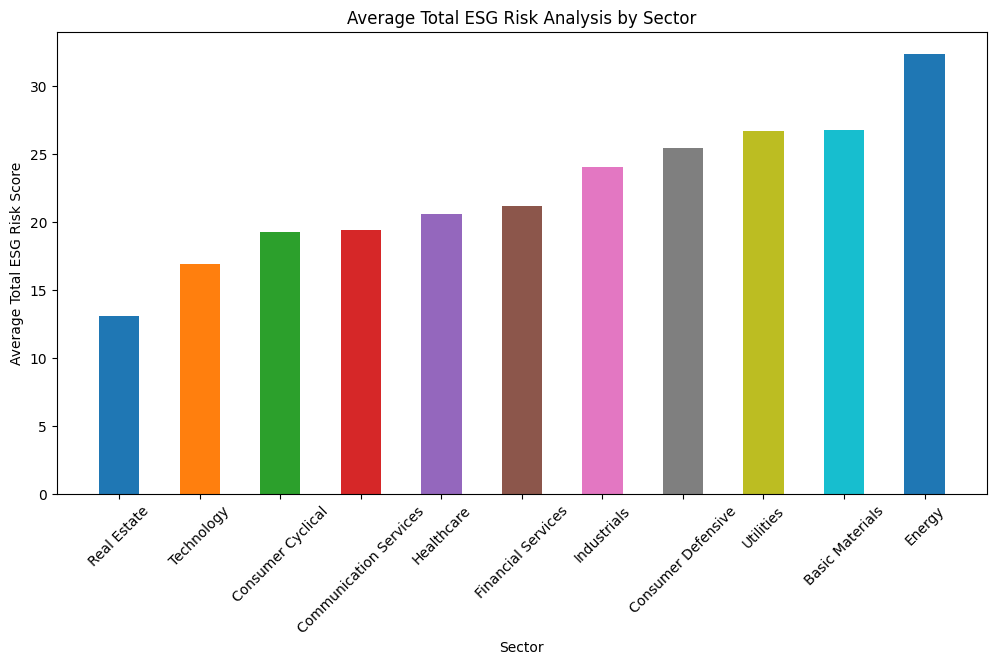

In [5]:
average_total_esg_score =  dataset.groupby('Sector')['Total ESG Risk Score'].mean().reset_index().sort_values(by='Total ESG Risk Score')

fig = plt.figure(figsize= (12, 6))
colors = plt.get_cmap('tab10').colors
plt.bar(average_total_esg_score['Sector'], average_total_esg_score['Total ESG Risk Score'], color=colors[:len(average_total_esg_score)], width=0.5)
plt.xticks(rotation=45)
plt.xlabel('Sector')
plt.ylabel('Average Total ESG Risk Score')
plt.title('Average Total ESG Risk Analysis by Sector')
plt.show()


## Total ESG Risk Top 10 Performers By Sector:

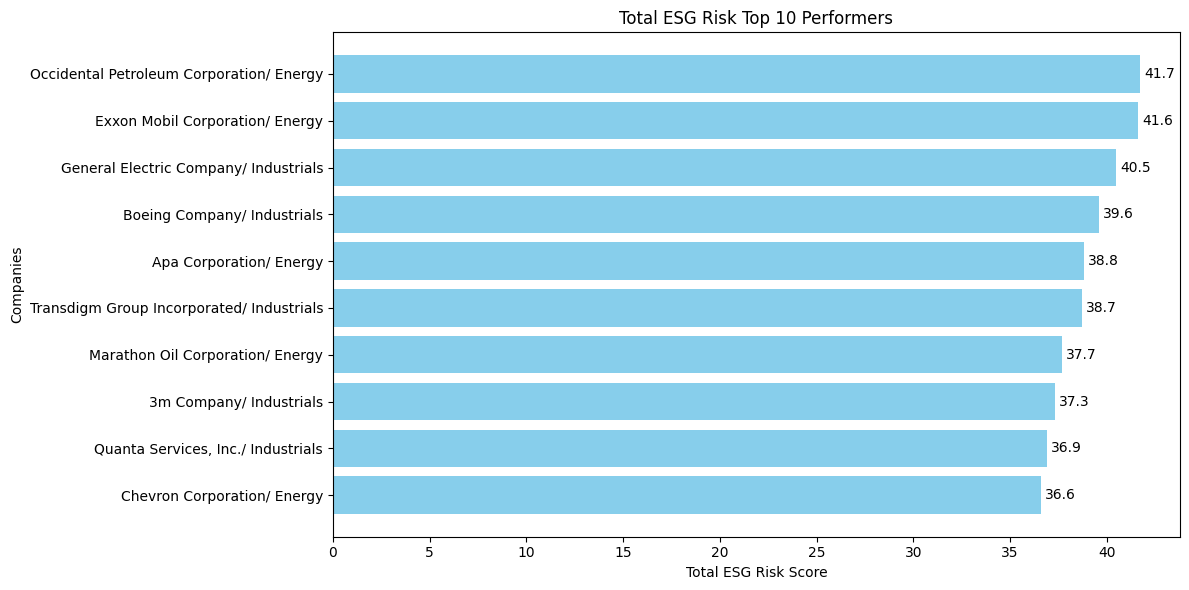

In [6]:
# sort data
top_10_performers = dataset.sort_values(by=['Total ESG Risk Score'], ascending=False).head(10).reset_index()

# add sector to company name
top_10_performers['Company_Sector'] = top_10_performers['Name'] + '/ ' + top_10_performers['Sector']

fig, ax = plt.subplots(figsize=(12,6))
bars = ax.barh(top_10_performers['Company_Sector'][::-1], top_10_performers['Total ESG Risk Score'][::-1], color='skyblue')
ax.bar_label(bars, fmt='%.1f', padding=3)
plt.xlabel('Total ESG Risk Score')
plt.ylabel('Companies')
plt.title('Total ESG Risk Top 10 Performers')
plt.tight_layout()
plt.show()

## Standard Normal Distribution:

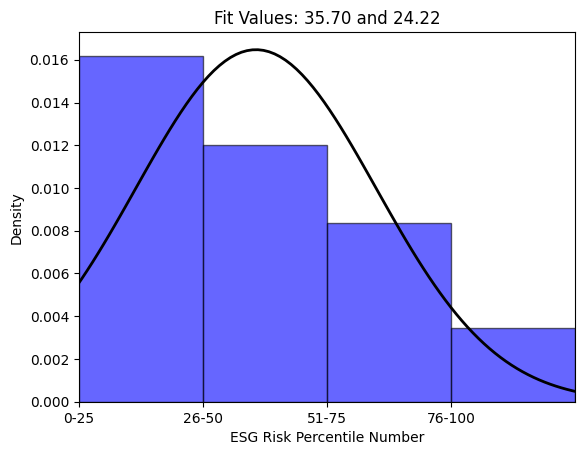

In [7]:
dataset = dataset.copy()
dataset['ESG Risk Percentile Number'] = dataset['ESG Risk Percentile'].str.extract('(\d+)').astype(float)
dataset = dataset.dropna(subset=['ESG Risk Percentile Number'])

mu, std = norm.fit(dataset['ESG Risk Percentile Number'])
bins = [0, 25, 50, 75, 100]
bin_labels = ['0-25', '26-50', '51-75', '76-100']

# Plot the histogram
hist, edges = np.histogram(dataset['ESG Risk Percentile Number'], bins=bins, density=True)
plt.hist(dataset['ESG Risk Percentile Number'], bins=bins, density=True, alpha=0.6, color='b', edgecolor='black')

xmin, xmax = plt.xlim() 
x = np.linspace(xmin, xmax, 100)

# Plot the PDF
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Adjust x-axis limits to fit the bins
plt.xlim(min(bins), max(bins))

# Add labels for bins on x-axis
plt.xticks(ticks=bins[:-1], labels=bin_labels)

title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
plt.xlabel('ESG Risk Percentile Number')
plt.ylabel('Density')

plt.show()